201911155 김미승
실습 #1 : 인구 구조 시각화 
 


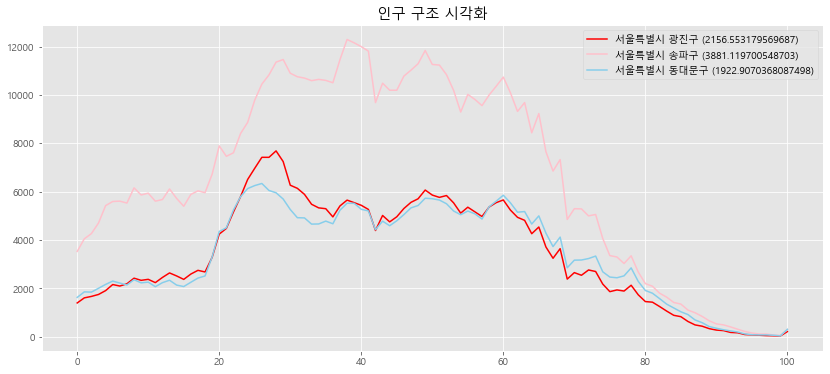

In [25]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

print("201911155 김미승")
print("실습 #1 : 인구 구조 시각화 \n ")
# 기온 데이터 기간 : 2020-12 ~ 2020-12 

f = open('seoulpopulation.csv')
data = csv.reader(f, delimiter=',')

headers = next(data)

targetString = ""
target = []

maxString = ""
minString = ""
maxValue = 0
minValue = 999999999999
maxResult = []
minResult = []

# '광진구' 인구 구조 
for row in data:
    if '광진구' in row[1]:
        targetString = row[1]
        slist = []
        for s in row[4:]:
            slist.append(s.replace(',', '')) 
        target = np.array(slist, dtype=np.int32) 
        break
f.seek(0)
next(data)

for row in data:
    if '광진구' in row[1]:
        continue

    slist = []
    for s in row[4:]:
        slist.append(s.replace(',', ''))
    city = np.array(slist, dtype=np.int32)

    result = (target - city)**2
    resultSum = np.sum(result)

    if resultSum > maxValue:
        maxString = row[1]
        maxValue = resultSum
        maxResult = city

    elif resultSum < minValue:
        minString = row[1]
        minValue = resultSum
        minResult = city

# 그래프 출력
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
plt.figure(figsize=(14,6))

plt.title('인구 구조 시각화')
plt.style.use('ggplot') #격자무늬 그래프
plt.plot(target, color='red', label= targetString +"(" + str(np.std(target)) +")") # 표준편차 np.std()
plt.plot(maxResult, color='pink', label=maxString+"(" + str(np.std(maxResult)) +")")
plt.plot(minResult, color='skyblue', label=minString+"(" + str(np.std(minResult)) +")")
plt.legend()
plt.show()

f.close()